# Imports and paths

In [1]:
# ROOT PATH
# REPLACE root_path WITH CORRECT ROOT FOLDER PATH
root_path = "C:/Users/amira/OneDrive - University of Leeds/Projects/Palindrome/Market Segmentation/"

# path to code base
code_base_path = root_path + "Code/datafi_palindrome_segmentation/"

### RAW DATA NOT USED HERE
# # path to root of raw data files
# raw_data_path = root_path + "Data/"

# path to output folder
output_data_path = root_path + "Output Data - SA/"

In [2]:
### Import standard libraries
import os
# change working directory to the code base folder
os.chdir(path=code_base_path)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import bespoke functions from file (Palindrome Data)
# [None needed in this notebook]

# Import merged dataset

In [3]:
df_merged = pd.read_csv(output_data_path + "Processed Data/DHS_merged.csv", low_memory=False)

# Select variables

Based on visual inspection of the outputs of the Variable Extraction Notebooks

In [4]:
### Background and admin variables (except Health Insurance)

admin_ids = [
    # respondent IDs
    "cluster", "household", "line",
    # data source IDs
    "source_dhs", "source_ahs", "source_hiv"
]
admin_dict = {
    "v135": "visitor_or_not",
    # geog
    "ADM2_EN": "district",
    "ADM1_EN": "region",
    "v024": "region_from_survey",
    # Sample weights etc.
    "v005": "dhs_sample_weight",
    "v021": "dhs_primary_sampling_unit",
    "v023": "dhs_sample_stratum",
    # HIV vars
    "hiv03": "hiv_result",
    "hiv05": "hiv_sample_weight",
    # Health Insurance
    "v481": "has_health_insurance_DHS",  # DHS
    "s1402": "has_health_insurance_AHS",  # AHS
}


### Feautures

features_other = ["gender"]
feature_dict = {
    # demographics
    "v013": "age_group",
    "v025": "urban_rural",
    "v131": "ethnicity",
    "v149": "education_attainment",
    "v155": "literacy",
    "v501": "marital_status",
    "v202": "sons_at_home",
    "v203": "daughters_at_home",
    # money-related
    "v190": "wealth_bracket",
    "v717": "occupation_group",
    "v745a": "homeowner",
    "v170": "has_bank_account",
    # household
    "v104": "years_in_residence",
    "v151": "sex_of_head",
    "v152": "age_of_head",
    # information access
    "v157": "freq_newspaper_mag",  # frequency of reading newspaper or magazine
    "v158": "freq_radio",  # frequency of listening to radio
    "v159": "freq_tv",  # frequency of watching television
    "v169a": "owns_mobile_phone",
    "v169b": "uses_phone_transactions",  # use mobile telephone for financial transactions
    "v171a": "internet_use_ever",  ## this is [never, in last year, before last year]
    "v171b": "freq_internet_last_month",  ## this is more reflective of real useage.
    # sexual health
    "v312": "current_contraceptive_method",
    "v525": "age_at_first_sex",
    "v750": "ever_heard_of_sti",
    "v751": "ever_heard_of_aids",
    "v763a": "had_sti_past_year",
    "v781": "ever_hiv_tested",
    "v783": "know_place_hiv_test",
    "v785": "heard_of_other_sti",
    ### UNUSED (see next notebook)
    # "has_health_insurance",  # health insurance now a post-segmentation descriptor
    # "current_contraceptive_method", # CORRELATES TOO STRONGLY WITH FAMILY PLANNING?
    # "v761": "used_condom_last", # CORRELATES TOO STRONGLY WITH FAMILY PLANNING?
    # "relationship_to_head", # ESSENTIALLY ENCODES "ADULT OR NOT"?
    # 's1404':'last_month_received_healthcare', # AHS
}


### Targets

target_dict = {
    "v829": "last_hiv_test_facility",
    "s1452": "who_pays_medication",  # AHS
    ### NEW women-only variables
    "v326": "family_planning_last_source",
    "v3a07": "family_planning_first_source",
    "m15_1": "place_of_delivery",
    "m69_1": "post_birth_check_source",
    "m73_1": "baby_first_check_source",
    ### UNUSED
    # "v842": "antenatal_hiv_test_source",  # duplicated info from both other vars?
}
new_onehot_target_list = [
    # OneHot encoded variables (raw DHS)
    # use these to construct simple priv/pub variables
    # antenatal_source
    "m57a_1",
    "m57b_1",
    "m57e_1",
    "m57f_1",
    "m57g_1",
    "m57h_1",
    "m57m_1",
    "m57n_1",
    "m57x_1",

    ### UNUSED due to low N

    # # dental
    # "s1405a",
    # "s1405b",
    # "s1405c",
    # "s1405d",
    # "s1405e",
    # "s1405f",
    # "s1405g",
    # "s1405h",
    # "s1405i",
    # "s1405j",
    # "s1405k",
    # "s1405x",

    # # 'baby_fevercough_source'
    # "h32a_1",
    # "h32b_1",
    # "h32c_1",
    # "h32d_1",
    # "h32e_1",
    # "h32j_1",
    # "h32k_1",
    # "h32l_1",
    # "h32m_1",
    # "h32s_1",
    # "h32t_1",
    # "h32u_1",
    # "h32x_1",  # h32y_1 h32z_1 deleted

    # # 'sought_sti_advice_source'
    # "v770a",
    # "v770b",
    # "v770c",
    # "v770d",
    # "v770k",
    # "v770l",
    # "v770m",
    # "v770n",
    # "v770t",
    # "v770u",
    # "v770v",
    # "v770x",
]

In [5]:
# get lists of chosen DHS var names
admin_list = admin_ids + list(admin_dict.keys())
feature_list = ["gender"] + list(feature_dict.keys())
target_list = list(target_dict.keys()) + new_onehot_target_list

In [6]:
# select chosen variables from merged dataset
df = df_merged[admin_list + feature_list + target_list]

In [7]:
# combine all into one dict for easy renaming
rename_dict = {}
rename_dict.update(admin_dict)
rename_dict.update(feature_dict)
rename_dict.update(target_dict)

# select all relevant variables
df = df.rename(rename_dict, axis=1)
# check
df.shape

(14985, 64)

In [8]:
print("Observations with DHS data:", df.query("source_dhs == 1").shape[0])
print("Observations with AHS data:", df.query("source_ahs == 1").shape[0])
print("Observations with DHS and AHS data:", df.query("source_dhs == 1 and source_ahs == 1").shape[0])
print("Observations with DHS and AHS and HIV data:", df.query("source_dhs == 1 and source_ahs == 1 and source_hiv == 1").shape[0])

### Old results:
# Observations with DHS data: 12132
# Observations with AHS data: 10336
# Observations with DHS and AHS data: 7811
# Observations with DHS and AHS and HIV data: 4862

Observations with DHS data: 12132
Observations with AHS data: 10336
Observations with DHS and AHS data: 7811
Observations with DHS and AHS and HIV data: 4862


# Process data
Group variables together, make proxies, filter, etc.

### Normalise sample weights

dhs_sample_weight

In [9]:
df["dhs_sample_weight"] = df["dhs_sample_weight"] / 1000000

In [10]:
df["dhs_primary_sampling_unit"].count()

12132

In [11]:
df["dhs_sample_stratum"].count()

12132

hiv_sample_weight

In [12]:
var = "hiv_sample_weight"
df["hiv_sample_weight"] = df["hiv_sample_weight"] / 1000000

print(df[var].shape[0], df[var].count())

14985 6912


## Filters

### Visitor filter

In [13]:
df.value_counts("visitor_or_not")

visitor_or_not
usual resident    11798
visitor             334
dtype: int64

In [14]:
# Keep people with this field missing.
df = df[~(df["visitor_or_not"] == "visitor")]

### Age filter

In [15]:
df.value_counts("age_group")

age_group
15-19    2160
20-24    1922
25-29    1819
30-34    1684
35-39    1333
40-44    1275
45-49    1171
50-54     221
55-59     213
dtype: int64

In [16]:
# restrict age - filter out >49s
df = df[~((df["age_group"] == "50-54") | (df["age_group"] == "55-59"))]

## Variable processing

- Merging multiple variables
- Creating new variables
- Grouping variable values
- Cleaning variable value names

##### Sort out the two health insurance columns

In [17]:
# See if rows with both columns available always agree
HI_df = df[["has_health_insurance_AHS", "has_health_insurance_DHS"]].copy()
HI_df_no_nan = HI_df.dropna()
print("All rows:", HI_df_no_nan.shape[0])  # total length
print(
    "Rows that agree:",
    (
        HI_df_no_nan["has_health_insurance_AHS"]
        == HI_df_no_nan["has_health_insurance_DHS"]
    ).sum(),
)
# All agree

All rows: 7194
Rows that agree: 7194


In [18]:
df["has_health_insurance_AHS"].value_counts()

no     8399
yes    1320
Name: has_health_insurance_AHS, dtype: int64

In [19]:
df["has_health_insurance_DHS"].value_counts()

no     6279
yes     915
Name: has_health_insurance_DHS, dtype: int64

In [20]:
# make variable which combines the DHS and AHS variables to get maximum coverage (since they encode the same information)
df["has_health_insurance"] = df["has_health_insurance_DHS"].fillna(
    df["has_health_insurance_AHS"]
)
df["has_health_insurance"].value_counts()
# Seems as though all DHS HI data was also within AHS. AHS had extra values.

no     8399
yes    1320
Name: has_health_insurance, dtype: int64

##### Make New Variable: n_children_at_home

In [21]:
# df['sons_at_home'].value_counts()
df["n_children_at_home"] = df["sons_at_home"] + df["daughters_at_home"]

##### education_attainment

<AxesSubplot:>

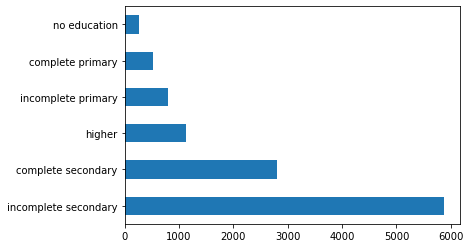

In [22]:
df["education_attainment"].value_counts().plot.barh()

##### Employed

In [23]:
df["occupation_group"].unique().tolist()

['not working',
 'clerical',
 'skilled manual',
 nan,
 'unskilled manual',
 'household and domestic',
 'professional/technical/managerial',
 "don't know",
 'agriculture - unskilled',
 'services',
 'agricultural - unskilled',
 'agricultural - self employed',
 'agriculture - self employed']

In [24]:
df["employed"] = df["occupation_group"].replace(
    {
        "not working": "unemployed",  # unemployed
        "clerical": "employed",
        "skilled manual": "employed",
        "unskilled manual": "employed",
        "household and domestic": "employed",
        "professional/technical/managerial": "employed",
        "don't know": np.nan,  # unknown
        "agriculture - unskilled": "employed",
        "services": "employed",
        "agricultural - unskilled": "employed",
        "agricultural - self employed": "employed",
        "agriculture - self employed": "employed",
    }
)

# df['employed']

##### Homeowner

['does not own', 'both alone and jointly', nan, 'alone only', 'jointly only']

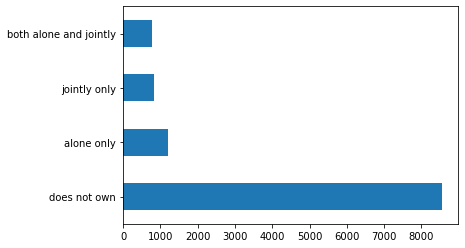

In [25]:
df["homeowner"].value_counts().plot.barh()
df["homeowner"].unique().tolist()

In [26]:
df["homeowner"] = df["homeowner"].replace(
    {
        "does not own": "no",
        "both alone and jointly": "yes",
        "alone only": "yes",
        "jointly only": "yes",
    }
)

# df['homeowner']

##### Ethnicity

In [27]:
list(df["ethnicity"].unique())

['black/african', nan, 'coloured', 'white', 'indian/asian', 'other']

In [28]:
df["ethnicity"] = df["ethnicity"].str.replace("/", "_slash_")
# df['ethnicity']

##### Age groups

In [29]:
np.sort(df["age_group"].unique().tolist())

array(['15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49',
       'nan'], dtype='<U32')

In [30]:
df["age_group_2"] = df["age_group"].replace(
    {
        "15-19": "adolescent",
        "20-24": "young adult",
        "25-29": "adult",
        "30-34": "adult",
        "35-39": "adult",
        "40-44": "middle-aged",
        "45-49": "middle-aged",
    }
)

# df['age_group_2']

##### years_in_residence

<AxesSubplot:>

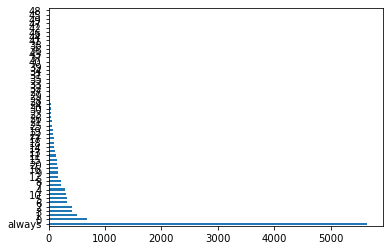

In [31]:
var = "years_in_residence"

df[var].value_counts().plot.barh()
# df[var].unique().tolist()

In [32]:
df[var].replace({"always": 999}, inplace=True)

##### relationship_to_head

In [33]:
# var = "relationship_to_head"

# df[var].value_counts().plot.barh()
# # df[var].unique().tolist()

##### sex_of_head

<AxesSubplot:>

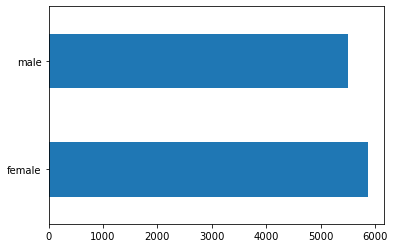

In [34]:
var = "sex_of_head"

df[var].value_counts().plot.barh()
# df[var].unique().tolist()

##### age_of_head

<AxesSubplot:>

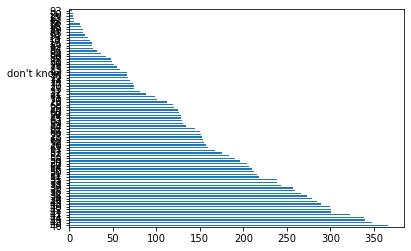

In [35]:
var = "age_of_head"

df[var].value_counts().plot.barh()
# df[var].unique().tolist()

In [36]:
df[var].replace({"don't know": np.nan}, inplace=True)

##### literacy

['able to read only parts of sentence',
 'able to read whole sentence',
 nan,
 'cannot read at all',
 'blind/visually impaired',
 'no card with required language']

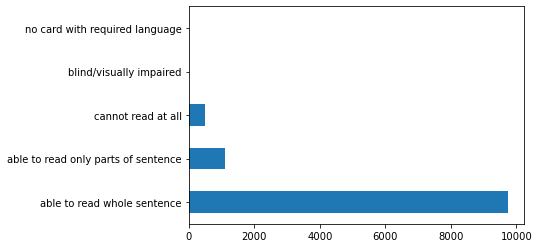

In [37]:
var = "literacy"

df[var].value_counts().plot.barh()
df[var].unique().tolist()

In [38]:
df[var].replace(
    {"no card with required language": np.nan, "blind/visually impaired": np.nan},
    inplace=True,
)

##### marital_status

<AxesSubplot:>

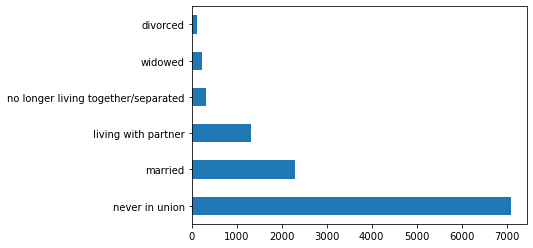

In [39]:
var = "marital_status"

df[var].value_counts().plot.barh()
# df[var].unique().tolist()

##### current_contraceptive_method

<AxesSubplot:>

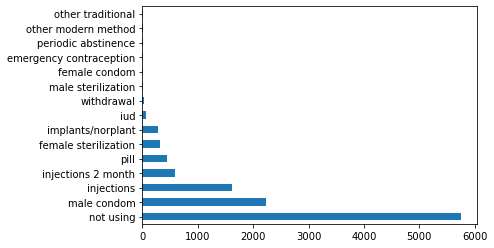

In [40]:
var = "current_contraceptive_method"

df[var].value_counts().plot.barh()
# df[var].unique().tolist()

##### age_at_first_sex

<AxesSubplot:>

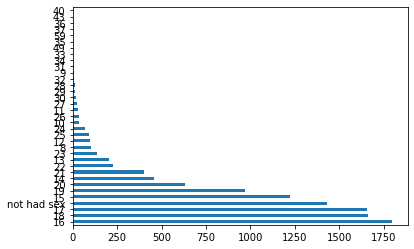

In [41]:
var = "age_at_first_sex"

df[var].value_counts().plot.barh()
# df[var].unique().tolist()

In [42]:
df[var].replace({"not had sex": 999}, inplace=True)

##### ever_heard_of_sti

<AxesSubplot:>

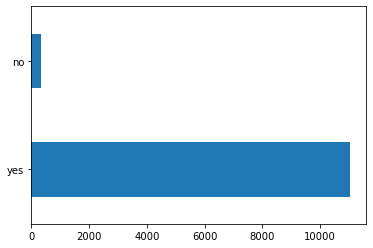

In [43]:
var = "ever_heard_of_sti"

df[var].value_counts().plot.barh()
# df[var].unique().tolist()

##### ever_heard_of_aids

<AxesSubplot:>

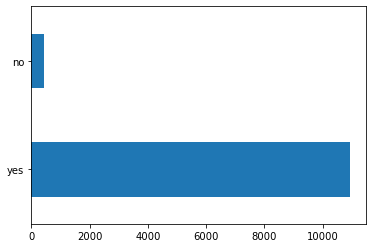

In [44]:
var = "ever_heard_of_aids"

df[var].value_counts().plot.barh()
# df[var].unique().tolist()

##### had_sti_past_year

['no', nan, 'yes', "don't know"]

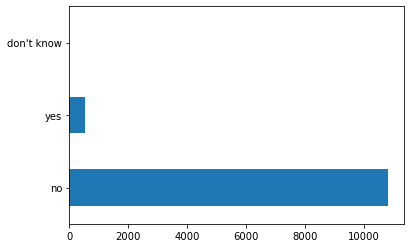

In [45]:
var = "had_sti_past_year"

df[var].value_counts().plot.barh()
df[var].unique().tolist()

In [46]:
df[var].replace({"don't know": np.nan}, inplace=True)

##### ever_hiv_tested

<AxesSubplot:>

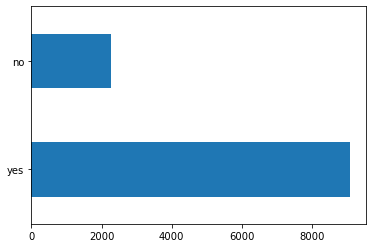

In [47]:
var = "ever_hiv_tested"

df[var].value_counts().plot.barh()
# df[var].unique().tolist()

##### know_place_hiv_test

<AxesSubplot:>

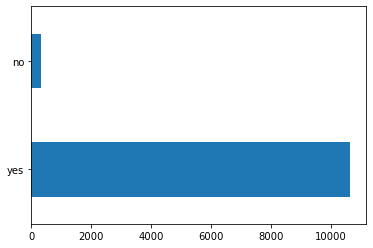

In [48]:
var = "know_place_hiv_test"

df[var].value_counts().plot.barh()
# df[var].unique().tolist()

##### heard_of_other_sti

<AxesSubplot:>

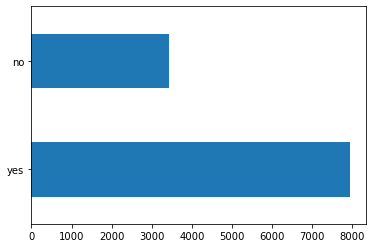

In [49]:
var = "heard_of_other_sti"

df[var].value_counts().plot.barh()
# df[var].unique().tolist()

##### used_condom_last

In [50]:
# var = "used_condom_last"

# df[var].value_counts().plot.barh()
# # df[var].unique().tolist()

##### hiv_result

<AxesSubplot:>

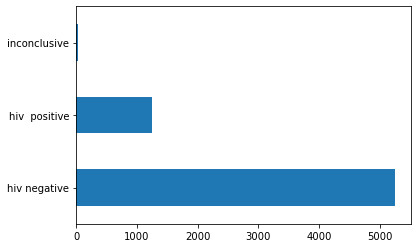

In [51]:
var = "hiv_result"

df[var].value_counts().plot.barh()
# df[var].unique().tolist()

In [52]:
df[var].replace(
    {"hiv negative": "negative", "hiv  positive": "positive", "inconclusive": np.nan},
    inplace=True,
)

##### owns_mobile_phone

<AxesSubplot:>

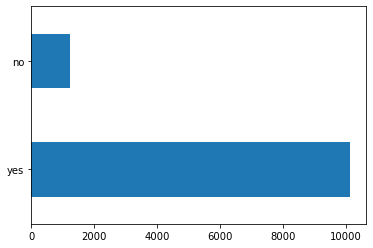

In [53]:
var = "owns_mobile_phone"

df[var].value_counts().plot.barh()
# df[var].unique().tolist()

##### uses_phone_transactions

In [54]:
df["uses_phone_transactions"].value_counts()

no     6960
yes    3180
Name: uses_phone_transactions, dtype: int64

##### Internet use

['not at all',
 'almost every day',
 'at least once a week',
 nan,
 'less than once a week']

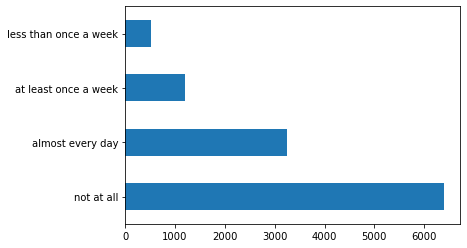

In [55]:
df["freq_internet_last_month"].value_counts().plot.barh()
df["freq_internet_last_month"].unique().tolist()

In [56]:
df["used_internet_last_month"] = df["freq_internet_last_month"].replace(
    {
        "not at all": "no",
        "almost every day": "yes",
        "at least once a week": "yes",
        "less than once a week": "yes",
    }
)

##### TV, Radio, Newspaper/Magazine

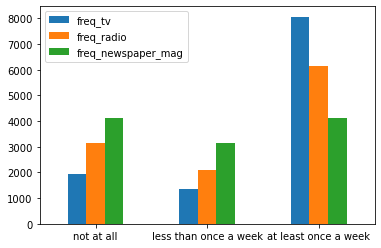

freq_tv  freq_radio  freq_newspaper_mag
not at all                1950        3149                4115
less than once a week     1352        2082                3139
at least once a week      8062        6133                4110

In [57]:
tv_radio_newspaper_value_counts = (
    df["freq_tv"]
    .value_counts()
    .to_frame()
    .join(df["freq_radio"].value_counts())
    .join(df["freq_newspaper_mag"].value_counts())
)
tv_radio_newspaper_value_counts = tv_radio_newspaper_value_counts.reindex(
    ["not at all", "less than once a week", "at least once a week"]
)

tv_radio_newspaper_value_counts.plot.bar(rot=0)
plt.show()

tv_radio_newspaper_value_counts

In [58]:
# make new vars
df[["reads_newspaper_mag", "listens_radio", "watches_tv"]] = df[
    ["freq_newspaper_mag", "freq_radio", "freq_tv"]
].replace(
    {"not at all": "no", "at least once a week": "yes", "less than once a week": "yes"}
)
# check
# df[['reads_newspaper_mag','listens_radio','watches_tv']]

### Targets

##### Last HIV test

[nan,
 'workplace',
 'government clinic/community health centre',
 'government hospital',
 'other public sector',
 'private hospital, clinic or doctor',
 'mobile/temporary hct services',
 'correctional facility',
 'private hospital/clinic/private doctor',
 'other',
 'home',
 'other private medical sector',
 'pharmacy',
 'chemist/pharmacy',
 'new start testing site']

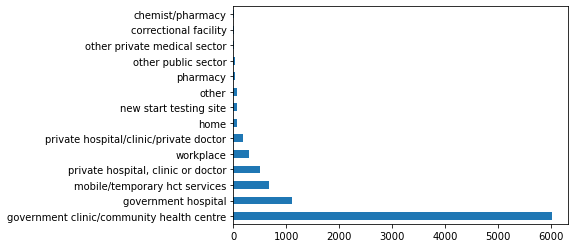

In [59]:
df["last_hiv_test_facility"].value_counts().plot.barh()
df["last_hiv_test_facility"].unique().tolist()

<AxesSubplot:>

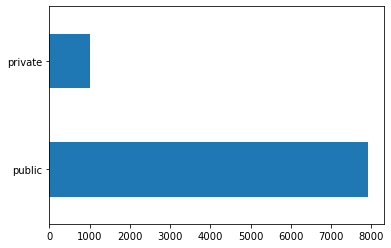

In [60]:
df["last_hiv_test_sector"] = df["last_hiv_test_facility"].replace(
    {
        "government clinic/community health centre": "public",
        "government hospital": "public",
        "mobile/temporary hct services": "public",
        "workplace": "private",
        "private hospital, clinic or doctor": "private",
        "private hospital/clinic/private doctor": "private",
        "new start testing site": "public",
        "other": np.nan,  # Private/Public? TEST size.
        "home": np.nan,  # Private/Public? TEST size.
        "other public sector": "public",
        "pharmacy": "private",
        "other private medical sector": "private",
        "chemist/pharmacy": "private",
        "correctional facility": "public",
    }
)

df["last_hiv_test_sector"].value_counts().plot.barh()

##### Who pays medication

[nan,
 'provided by public clinic or hospital',
 'medical aid',
 'family/friend',
 'respondent',
 'employer',
 'other']

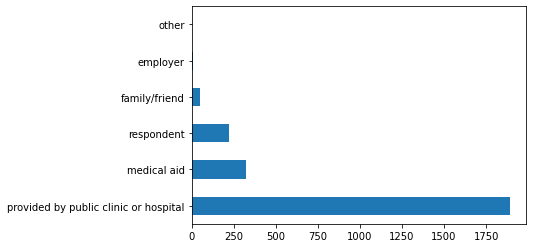

In [61]:
df["who_pays_medication"].value_counts().plot.barh()
df["who_pays_medication"].unique().tolist()

<AxesSubplot:>

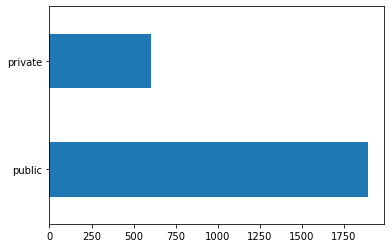

In [62]:
df["medication_payment"] = df["who_pays_medication"].replace(
    {
        "provided by public clinic or hospital": "public",
        "medical aid": "private",  # NOTE: COUNTING MEDICAL AID AS PRIVATE
        "family/friend": "private",
        "respondent": "private",
        "employer": "private",
        "other": np.nan,
    }
)

df["medication_payment"].value_counts().plot.barh()

##### family_planning_last_source

[nan,
 'govt. health clinic/community health centre',
 'govt. hospital',
 'private hospital/clinic',
 'chemist/pharmacy',
 'shop',
 'mobile clinic',
 'private doctor',
 'community center, library or other public place',
 'workplace/workplace clinic',
 'other',
 'other public sector',
 'friend/relative',
 'other private medical sector']

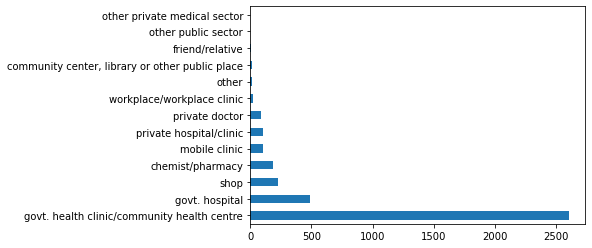

In [63]:
df["family_planning_last_source"].value_counts().plot.barh()
df["family_planning_last_source"].unique().tolist()

<AxesSubplot:>

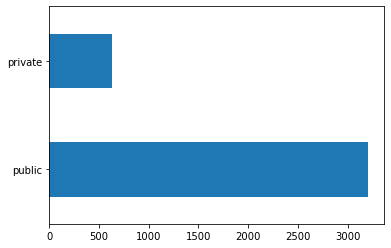

In [64]:
df["family_planning_last_source_sector"] = df["family_planning_last_source"].replace(
    {
        "govt. health clinic/community health centre": "public",
        "govt. hospital": "public",
        "private hospital/clinic": "private",
        "chemist/pharmacy": "private",
        "shop": "private",
        "mobile clinic": "public",
        "private doctor": "private",
        "community center, library or other public place": "public",
        "workplace/workplace clinic": "private",
        "other": np.nan,
        "other public sector": "public",
        "friend/relative": "private",
        "other private medical sector": "private",
    }
)

df["family_planning_last_source_sector"].value_counts().plot.barh()

##### family_planning_first_source_of_current

[nan,
 'govt. health clinic/community health centre',
 'govt. hospital',
 'private hospital/clinic',
 'chemist/pharmacy',
 'shop',
 'mobile clinic',
 'private doctor',
 'community center, library or other public place',
 'workplace/workplace clinic',
 'other',
 'church',
 'chw',
 'friend/relative',
 'other private medical sector']

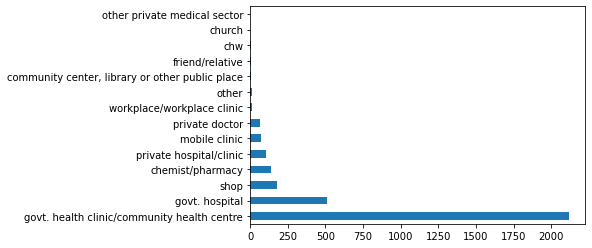

In [65]:
df["family_planning_first_source"].value_counts().plot.barh()
df["family_planning_first_source"].unique().tolist()

<AxesSubplot:>

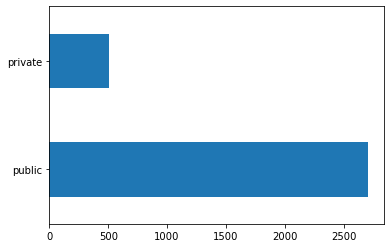

In [66]:
df["family_planning_first_source_sector"] = df["family_planning_first_source"].replace(
    {
        "govt. health clinic/community health centre": "public",
        "govt. hospital": "public",
        "private hospital/clinic": "private",
        "chemist/pharmacy": "private",
        "shop": "private",
        "mobile clinic": "public",
        "private doctor": "private",
        "community center, library or other public place": "public",
        "workplace/workplace clinic": "private",
        "other": np.nan,
        "church": "public",
        "chw": "public",  # community health worker
        "friend/relative": "private",
        "other private medical sector": "private",
    }
)

df["family_planning_first_source_sector"].value_counts().plot.barh()

##### place of delivery

[nan,
 'government hospital',
 'government clinic/community health centre',
 "respondent's home",
 'private hospital/doctor',
 'other',
 'other public sector',
 'other home',
 'mobile clinic']

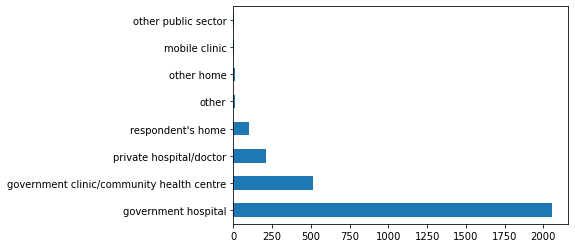

In [67]:
df["place_of_delivery"].value_counts().plot.barh()
df["place_of_delivery"].unique().tolist()

<AxesSubplot:>

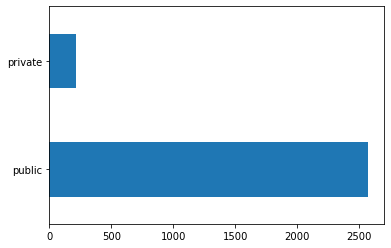

In [68]:
df["place_of_delivery_sector"] = df["place_of_delivery"].replace(
    {
        "government hospital": "public",
        "government clinic/community health centre": "public",
        "respondent's home": np.nan,  # priv/pub??
        "private hospital/doctor": "private",
        "other": np.nan,  # priv/pub??
        "other public sector": "public",
        "other home": np.nan,  # priv/pub??
        "mobile clinic": "public",
    }
)

df["place_of_delivery_sector"].value_counts().plot.barh()

##### post_birth_check_source

[nan,
 'government clinic/comm. health center',
 'government hospital',
 'private hospital/doctor',
 'other home',
 "respondent's home",
 'mobile clinic']

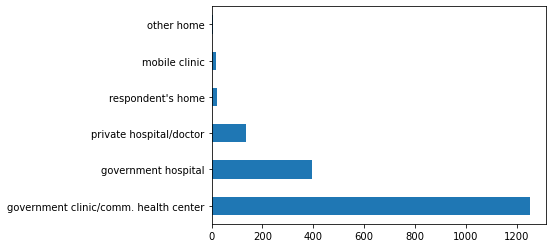

In [69]:
df["post_birth_check_source"].value_counts().plot.barh()
df["post_birth_check_source"].unique().tolist()

<AxesSubplot:>

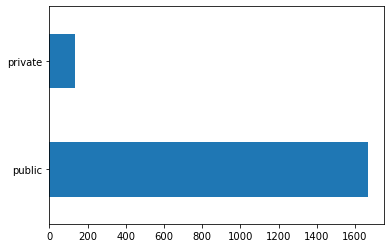

In [70]:
df["post_birth_check_source_sector"] = df["post_birth_check_source"].replace(
    {
        "government clinic/comm. health center": "public",
        "government hospital": "public",
        "private hospital/doctor": "private",
        "other home": np.nan,
        "respondent's home": np.nan,
        "mobile clinic": "public",
    }
)

df["post_birth_check_source_sector"].value_counts().plot.barh()

##### baby_first_check_source

[nan,
 'government clinic/comm. health center',
 'mobile clinic',
 'government hospital',
 'other home',
 'private hospital/doctor',
 "respondent's home",
 'other private sector']

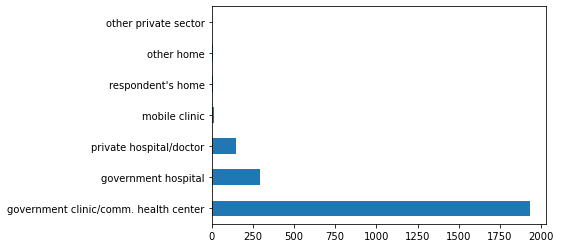

In [71]:
df["baby_first_check_source"].value_counts().plot.barh()
df["baby_first_check_source"].unique().tolist()

<AxesSubplot:>

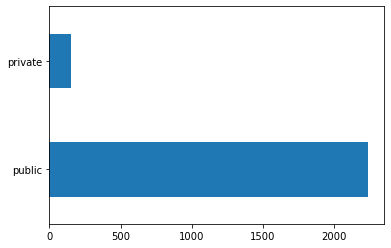

In [72]:
df["baby_first_check_source_sector"] = df["baby_first_check_source"].replace(
    {
        "government clinic/comm. health center": "public",
        "government hospital": "public",
        "private hospital/doctor": "private",
        "other private sector": "private",
        "other home": np.nan,
        "respondent's home": np.nan,
        "mobile clinic": "public",
    }
)

df["baby_first_check_source_sector"].value_counts().plot.barh()

##### Antenatal care source

<AxesSubplot:>

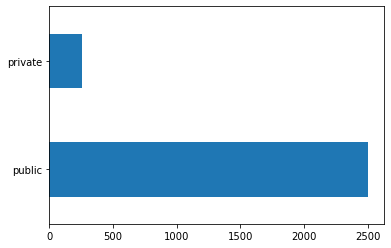

In [73]:
### public
# m57e_1	antenatal care: government hospital
# m57f_1	antenatal care: government clinic/comm. health center
# m57g_1	antenatal care: mobile clinic
# m57h_1	antenatal care: other public sector
### private
# m57m_1	antenatal care: private hospital/doctor
# m57n_1	antenatal care: other private medical sector
### unknown
# m57a_1	antenatal care: respondent's home
# m57b_1	antenatal care: other home
# m57x_1	antenatal care: other

public_vars = ["m57e_1", "m57f_1", "m57g_1", "m57h_1"]
private_vars = ["m57m_1", "m57n_1"]
# 'm57a_1', # other # home
# 'm57b_1', # other # home
# 'm57x_1' # other


# convert to single variable with "private", "public" or NaN entries
public_bool = (df[public_vars] == "yes").sum(axis=1) > 0
private_bool = (df[private_vars] == "yes").sum(axis=1) > 0

df["antenatal_care_sector"] = np.select(
    [private_bool, public_bool], ["private", "public"], default="unknown"
)
df["antenatal_care_sector"] = df["antenatal_care_sector"].replace({"unknown": np.nan})
# df['antenatal_care_sector']

df["antenatal_care_sector"].value_counts().plot.barh()

#### UNUSED

##### Dental care source

In [74]:
### public
# s1405a	place for medical, dental treatment: government hospital
# s1405b	place for medical, dental treatment: government clinical/community health centre
# s1405c	place for medical, dental treatment: other public sector
### private
# s1405d	place for medical, dental treatment: private hospital/clinic/doctor
# s1405e	place for medical, dental treatment: chemist/pharmacy
# s1405f	place for medical, dental treatment: dentist/hygienist/therapist
# s1405g	place for medical, dental treatment: other private sector
# s1405h	place for medical, dental treatment: workplace health service
# s1405i	place for medical, dental treatment: traditional healer
# s1405j	place for medical, dental treatment: traditional herbalist
# s1405k	place for medical, dental treatment: faith healer
### other
# s1405x	place for medical, dental treatment: other

# public_vars = ["s1405a", "s1405b", "s1405c"]
# private_vars = [
#     "s1405d",
#     "s1405e",
#     "s1405f",
#     "s1405g",
#     "s1405h",
#     "s1405i",
#     "s1405j",
#     "s1405k",
# ]
# # 's1405x' # other

# # convert to single variable with "private", "public" or NaN entries
# public_bool = (df[public_vars] == "yes").sum(axis=1) > 0
# private_bool = (df[private_vars] == "yes").sum(axis=1) > 0

# df["dental_care_sector"] = np.select(
#     [private_bool, public_bool], ["private", "public"], default="unknown"
# )
# df["dental_care_sector"] = df["dental_care_sector"].replace({"unknown": np.nan})
# # df['dental_care_sector']

# df["dental_care_sector"].value_counts().plot.barh()

##### sought_sti_advice_source

In [75]:
### public
# v770a	sought sti advice/treatment from: government hospital
# v770b	sought sti advice/treatment from: government clinic/community health worker
# v770c	sought sti advice/treatment from: mobile/temporary hct services
# v770d	sought sti advice/treatment from: other public sector

# v770l	sought sti advice/treatment from: new start testing site

### private
# v770k	sought sti advice/treatment from: private hospital/clinic/doctor
# v770m	sought sti advice/treatment from: chemist/pharmacy
# v770n	sought sti advice/treatment from: other private medical sector
# v770t	sought sti advice/treatment from: shop
# v770u	sought sti advice/treatment from: traditional herbalist
# v770v	sought sti advice/treatment from: traditional healer
### unknown
# v770x	sought sti advice/treatment from: other

# public_vars = ["v770a", "v770b", "v770c", "v770d", "v770l"]
# private_vars = ["v770k", "v770m", "v770n", "v770t", "v770u", "v770v"]
# # 'v770x', # other

# # convert to single variable with "private", "public" or NaN entries
# public_bool = (df[public_vars] == "yes").sum(axis=1) > 0
# private_bool = (df[private_vars] == "yes").sum(axis=1) > 0

# df["sti_advice_sector"] = np.select(
#     [private_bool, public_bool], ["private", "public"], default="unknown"
# )
# df["sti_advice_sector"] = df["sti_advice_sector"].replace({"unknown": np.nan})
# # df['sti_advice_sector']

# df["sti_advice_sector"].value_counts().plot.barh()

##### baby_fevercough_source

In [76]:
### public
# h32a_1	fever/cough: government hospital
# h32b_1	fever/cough: government clinic/comm. health centre
# h32c_1	fever/cough: mobile clinic
# h32d_1	fever/cough: community health worker
# h32e_1	fever/cough: other public sector
### private
# h32j_1	fever/cough: private hospital/ clinic
# h32k_1	fever/cough: private pharmacy
# h32l_1	fever/cough: private doctor
# h32m_1	fever/cough: other private sector
# h32s_1	fever/cough: supermarket/shop
# h32t_1	fever/cough: traditional healer
# h32u_1	fever/cough: market
### unknown
# h32x_1	fever/cough: other

# public_vars = ["h32a_1", "h32b_1", "h32c_1", "h32d_1", "h32e_1"]
# private_vars = ["h32j_1", "h32k_1", "h32l_1", "h32m_1", "h32s_1", "h32t_1", "h32u_1"]
# # 'h32x_1', # other

# # convert to single variable with "private", "public" or NaN entries
# public_bool = (df[public_vars] == "yes").sum(axis=1) > 0
# private_bool = (df[private_vars] == "yes").sum(axis=1) > 0

# df["baby_fevercough_sector"] = np.select(
#     [private_bool, public_bool], ["private", "public"], default="unknown"
# )
# df["baby_fevercough_sector"] = df["baby_fevercough_sector"].replace({"unknown": np.nan})
# # df['baby_fevercough_sector']

# df["baby_fevercough_sector"].value_counts().plot.barh()

##### antenatal_hiv_test_source

In [77]:
# target_dict = {
#     'v842':'antenatal_hiv_test_source', # duplicated info from both other vars?
# }

# Check dataset and save to file

In [78]:
vars_to_discard = [
    "has_health_insurance_DHS",
    "has_health_insurance_AHS",
    "who_pays_medication",
    "family_planning_last_source",
    "family_planning_first_source",
    "place_of_delivery",
    "post_birth_check_source",
    "baby_first_check_source",
]

df.drop(vars_to_discard + new_onehot_target_list, axis=1, inplace=True)

# # check
# df.columns
# df.shape

In [79]:
# save to file
df.to_csv(output_data_path + "Processed Data/DHS_merged_processed.csv", index=False)

# Extra
### Save copy of variable info table filtered to only the variables chosen in this notebook

In [ ]:
# import DHS var info (from SA.0 Variable Extraction)
DHS_vars = pd.read_excel(output_data_path + "Variables/usable_variables_info.xlsx", sheet_name="All")

# filter to only keep used variables
DHS_vars = DHS_vars[DHS_vars["variable_women"].isin(admin_list + feature_list + target_list)]

# make new variable role column
DHS_vars.insert(0, "variable_role", np.nan)

# label admin
DHS_vars.loc[
    DHS_vars["variable_women"].isin(admin_list),
    "variable_role",
] = "admin"

# label features
DHS_vars.loc[
    DHS_vars["variable_women"].isin(feature_list),
    "variable_role",
] = "feature"

# label targets
DHS_vars.loc[
    DHS_vars["variable_women"].isin(target_list),
    "variable_role",
] = "target"

# sort by variable role
DHS_vars = DHS_vars.sort_values(by='variable_role')

In [ ]:
# save filtered var info dataset to file for reference
DHS_vars.to_excel(output_data_path + "Variables/chosen_variables_info.xlsx", index=False)